In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn as sl
from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import PCA 



def load(path: str) -> pd.DataFrame:
    """Load a CSV file into a Dataset object.

    Args:
        path (str): path to the CSV file

    Returns:
        Dataset: object containing the data
    """
    try:
        if not path.lower().endswith(("csv")):
            raise AssertionError("Only csv formats are supported.")
        local_dir = os.path.abspath('')
        file_path = os.path.join(local_dir, path)
        if not os.path.exists(file_path) or os.path.isdir(file_path):
            raise AssertionError("File not found:", file_path)
        df = pd.read_csv(file_path)
        return df
    except AssertionError as error:
        print(f"{AssertionError.__name__}: {error}")
        return None

In [24]:
test_knight = load("../Test_knight.csv")

In [26]:
total_variance = test_knight.var().sum() #might need to be standardised
pct_variance = (test_knight.var())
print(pct_variance)

Sensitivity          14.132881
Hability             21.251915
Strength            675.999600
Power            145277.392861
Agility               0.000229
Dexterity             0.003237
Awareness             0.006648
Prescience            0.001717
Reactivity            0.000859
Midi-chlorien         0.000064
Slash                 0.065219
Push                  0.308469
Pull                  3.369613
Lightsaber         1620.559298
Survival              0.000010
Repulse               0.000424
Friendship            0.000675
Blocking              0.000037
Deflection            0.000100
Mass                  0.000008
Recovery             27.475459
Evade                42.326589
Stims              1318.103509
Sprint           408283.903926
Combo                 0.000517
Delay                 0.022674
Attunement            0.036849
Empowered             0.004436
Burst                 0.004971
Grasping              0.000293
dtype: float64


In [53]:
st = ss().fit_transform(test_knight)
pca = PCA(0.99)
pc = pca.fit_transform(st)

In [54]:
print(pca.explained_variance_ratio_)

[0.45325397 0.20918077 0.08988223 0.06354561 0.0540255  0.04104506
 0.01970586 0.01248169 0.0099581  0.00864213 0.00842696 0.0070612
 0.00613493 0.00460575 0.00259258]


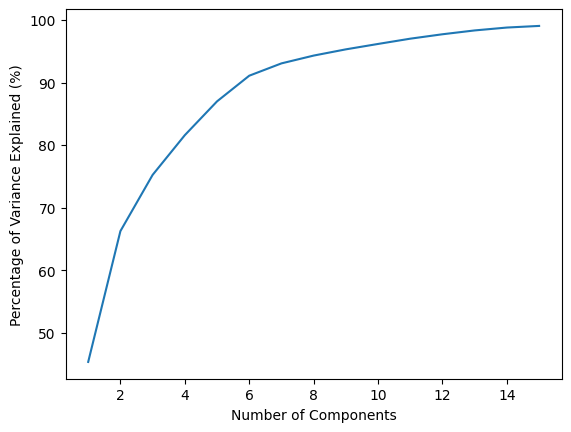

In [55]:
explained_variance = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance)
pct_explained_variance = cumulative_variance * 100 


plt.plot(range(1, len(explained_variance) + 1), pct_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance Explained (%)')
plt.show()

In [56]:
components = range(1, len(explained_variance) + 1)  # Component numbers
variance_explained = explained_variance * 100  # Convert to percentage

df = pd.DataFrame({'Component': components, 'Explained Variance (%)': variance_explained})
print(df)

    Component  Explained Variance (%)
0           1               45.325397
1           2               20.918077
2           3                8.988223
3           4                6.354561
4           5                5.402550
5           6                4.104506
6           7                1.970586
7           8                1.248169
8           9                0.995810
9          10                0.864213
10         11                0.842696
11         12                0.706120
12         13                0.613493
13         14                0.460575
14         15                0.259258
